In [1]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

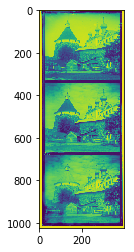

In [199]:
image = io.imread('/home/viliar/Документы/GIT/CV/public_tests/01_input/img.png')
plt.imshow(image)

In [200]:
a = np.round(image.shape[0] / 3).astype(np.int)
b = image.shape[1]

In [201]:
a, b

(341, 398)

In [202]:
color = [None, None, None]
img = [np.zeros((a,b), dtype=np.int),
       np.zeros((a,b), dtype=np.int),
       np.zeros((a,b), dtype=np.int)]

In [203]:
color[0] = image[:a]
color[1] = image[a:2*a]
color[2] = image[2*a:3*a]

In [204]:
x1 = np.round(a * 0.05).astype(np.int)
x2 = np.round(a * 0.95).astype(np.int)
y1 = np.round(b * 0.05).astype(np.int)
y2 = np.round(b * 0.95).astype(np.int)

In [205]:
x1,x2,y1,y2

(17, 324, 20, 378)

In [206]:
img[0][156]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [207]:
for i in range(3):
    img[i][x1:x2, y1:y2] = color[i][x1:x2, y1:y2]

In [208]:
mse(img[0], img[2])

(-10, -1)

In [213]:
def mse(image1, image2):
    nmin = np.inf
    best = (0,0)
    for i in range(-15,16):
        for j in range(-15,16):
            a = np.abs((image1[x1:x2, y1:y2] - image2[x1+i:x2+i, y1+j:y2+j])).sum()
            if a < nmin:
                nmin = a
                best = (i, j)
    return best

In [214]:
last = np.zeros((x2-x1,y2-y1,3), dtype=np.int)

In [219]:
last[:,:,0] = img[0][x1:x2, y1:y2]
first = mse(img[0], img[1])
last[:,:,1] = img[1][x1+first[0]:x2+first[0], y1+first[1]:y2+first[1]]
second = mse(img[0], img[2])
last[:,:,2] = img[2][x1+second[0]:x2+second[0], y1+second[1]:y2+second[1]]

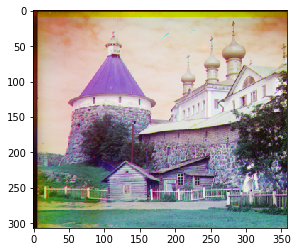

In [220]:
plt.imshow(last)